In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
import seaborn as sns
import matplotlib.animation as animation

In [2]:
data_path = r"/home/isaac/Desktop/prior.csv"
df = pd.read_csv(data_path)
print(df.head())

  dataset subset  feats       RMSE
0   KITTI     07   1000  17.469335
1   KITTI     05   1300  21.071012
2   KITTI     05   1500  22.305758
3   KITTI     10   1700  10.384996
4   KITTI     00   2000   9.939578


In [3]:
# Calculate the mean and standard deviation of RMSE for each subset
subset_stats = df.groupby('subset')['RMSE'].agg(['mean', 'std']).rename(columns={'mean': 'subset_mean', 'std': 'subset_std'})

# Merge the stats back into the original dataframe
df = df.merge(subset_stats, on='subset')

# Calculate the number of standard deviations each entry is from the mean
df['stds_from_mean'] = ((df['RMSE'] - df['subset_mean']) / df['subset_std']).abs()


In [4]:
df

,dataset,subset,feats,RMSE,subset_mean,subset_std,stds_from_mean
0,KITTI,07,1000,17.469335,17.621341,1.319745,0.115178
1,KITTI,05,1300,21.071012,21.587509,0.885696,0.583153
2,KITTI,05,1500,22.305758,21.587509,0.885696,0.810944
3,KITTI,10,1700,10.384996,6.230689,4.751169,0.874376
4,KITTI,00,2000,9.939578,11.383429,2.829592,0.510268
...,...,...,...,...,...,...,...
56,KITTI,10,1200,3.383954,6.230689,4.751169,0.599165
57,KITTI,10,2000,4.668196,6.230689,4.751169,0.328865
58,KITTI,10,2900,14.130437,6.230689,4.751169,1.662696
59,KITTI,10,3000,23.521691,6.230689,4.751169,3.639315


In [5]:
most_common_subset = df['subset'].mode()[0]

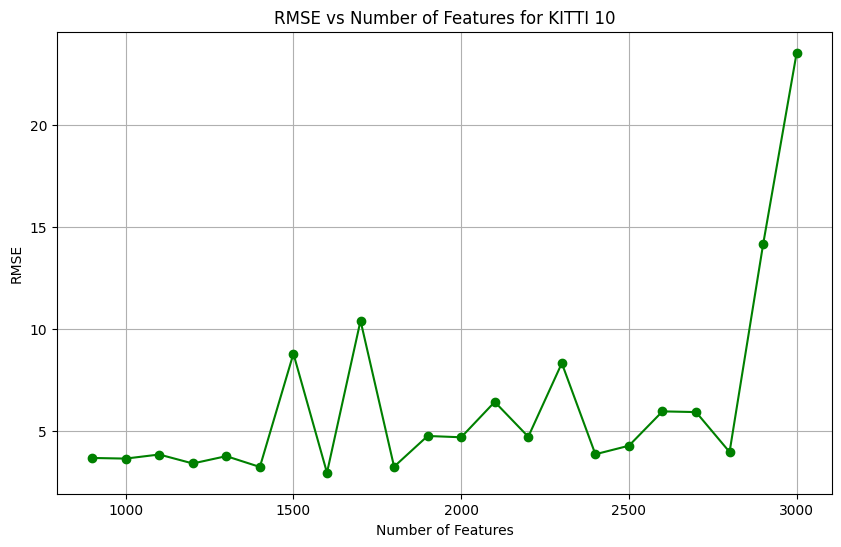

<Figure size 640x480 with 0 Axes>

In [ ]:
# graph the mse vs the number of features for the most common subset
def plot_mse_vs_num_features(df, subset):
    subset_df = df[df['subset'] == subset]
    # sort the dataframe by the number of features
    subset_df = subset_df.sort_values(by='feats')
    mse_values = subset_df['RMSE'].values

    plt.figure(figsize=(10, 6))
    plt.plot(subset_df['feats'].values, subset_df['RMSE'].values, marker='o', linestyle='-', color='g')
    plt.title(f'RMSE vs Number of Features for KITTI {subset}')
    plt.xlabel('Number of Features')
    plt.ylabel('RMSE')
    plt.grid()
    plt.show()
    plt.savefig(f'RMSE_vs_num_features_{subset}.png')

plot_mse_vs_num_features(df, most_common_subset)

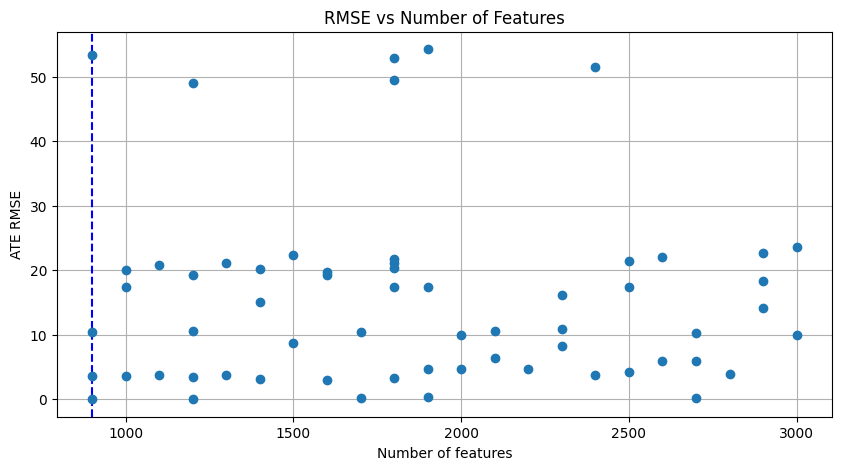

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(10, 5))
min_feats = df['feats'].min()
plt.axvline(x=min_feats, color='b', linestyle='--', label='Min Features')
plt.plot(df['feats'], df['RMSE'], 'o', label='data')
plt.xlabel('Number of features')
plt.ylabel('ATE RMSE')
plt.title('RMSE vs Number of Features')
plt.grid()
plt.show()
plt.savefig('mse_vs_num_features.png')

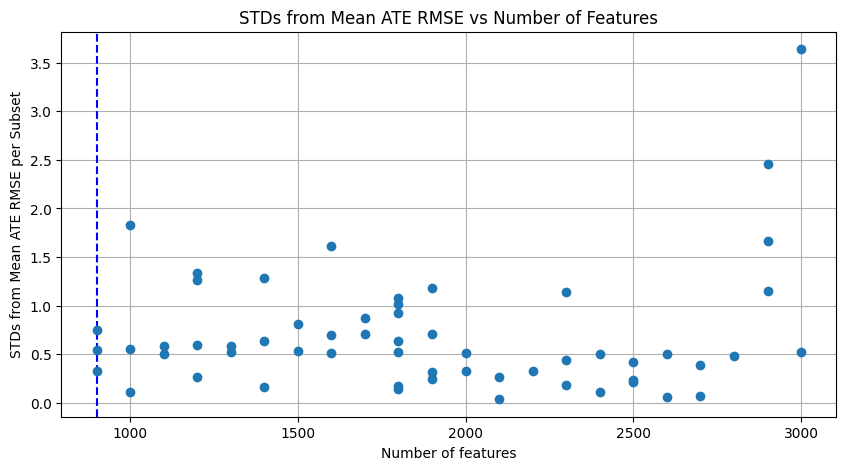

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(10, 5))
# please draw a vertical line at the min number of features
min_feats = df['feats'].min()
plt.axvline(x=min_feats, color='b', linestyle='--', label='Min Features')
plt.plot(df['feats'], df['stds_from_mean'], 'o', label='data')
plt.xlabel('Number of features')
plt.ylabel('STDs from Mean ATE RMSE per Subset')
plt.title('STDs from Mean ATE RMSE vs Number of Features')
plt.grid()
plt.show()
plt.savefig('stds_from_mean_vs_num_features.png')

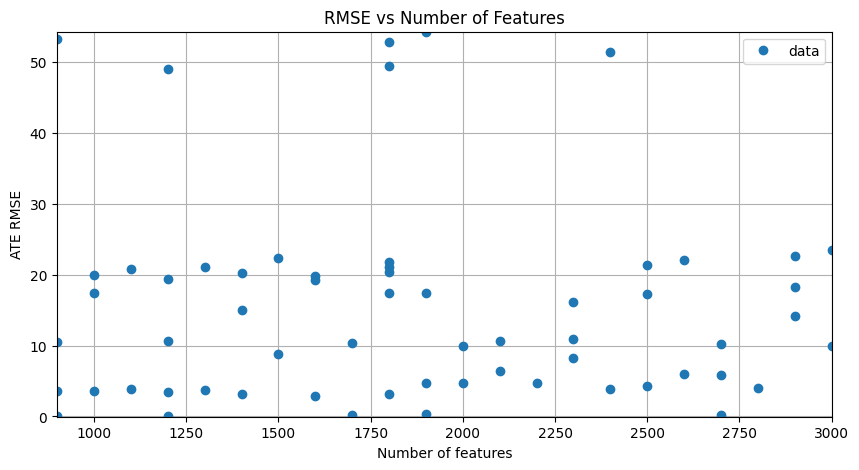

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(df['feats'].min() - 1, df['feats'].max() + 1)
ax.set_ylim(df['RMSE'].min() - 0.05, df['RMSE'].max() + 0.05)
ax.set_xlabel('Number of features')
ax.set_ylabel('ATE RMSE')
ax.set_title('RMSE vs Number of Features')
ax.grid()

# Initialize empty plot
scatter, = ax.plot([], [], 'o', label='data')
ax.legend()

# Animation update function
def update(frame):
    x = df['feats'][:frame]
    y = df['RMSE'][:frame]
    scatter.set_data(x, y)
    return scatter,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(df)+1, interval=200, blit=True, repeat=False)


# Save the animation as a gif
ani.save('rmse_over_feats.gif', fps=10)

In [10]:
kitti = df[df['dataset'] == 'KITTI']
euroc = df[df['dataset'] == 'EUROC']

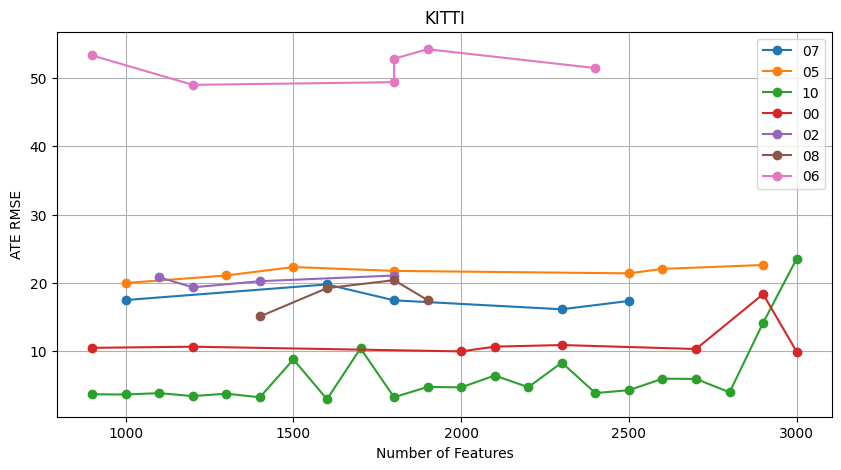

<Figure size 640x480 with 0 Axes>

In [11]:
# graph each point in kitti with the x axis being feats and the y axis being the error, color by the subset
plt.figure(figsize=(10, 5))
#sns.scatterplot(data=kitti, x='feats', y='RMSE', hue='subset', palette='Set1')

# please draw a line between the points in the same subset
for subset in kitti['subset'].unique():
    # sort the data by feats
    subset_data = kitti[kitti['subset'] == subset]
    subset_data = subset_data.sort_values(by='feats')
    plt.plot(subset_data['feats'], subset_data['RMSE'], marker='o', label=subset)
plt.legend()
plt.grid()
plt.title('KITTI')
plt.xlabel('Number of Features')
plt.ylabel('ATE RMSE')
plt.show()
plt.savefig('kitti_rmse_vs_num_features.png')